In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostRegressor # importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_excel('glass.xlsx',sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# EDA

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# Get the dimensions of the DataFrame (rows, columns)
df.shape

(214, 10)

In [ ]:
# Get information about the DataFrame's columns and data types
df.info()
# all the columns are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


##checking missing values

In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


##Identifying outliers
** note : It  is not mentioned in the assignment whether to keep outliers or deal with the so Im applying log transformation while keeping them.**

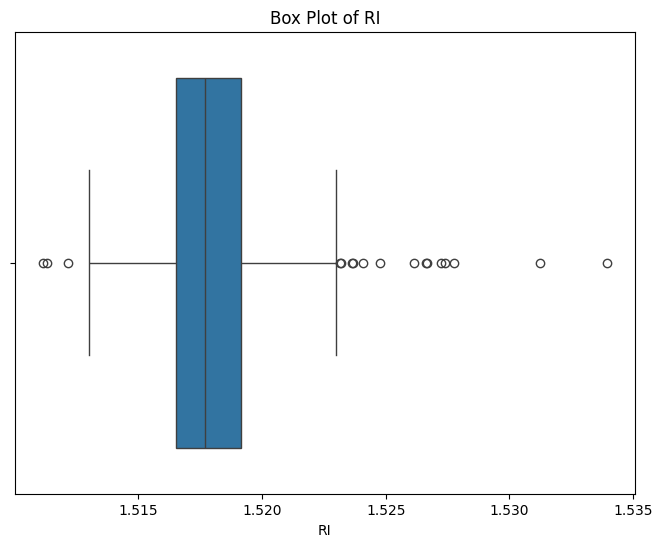

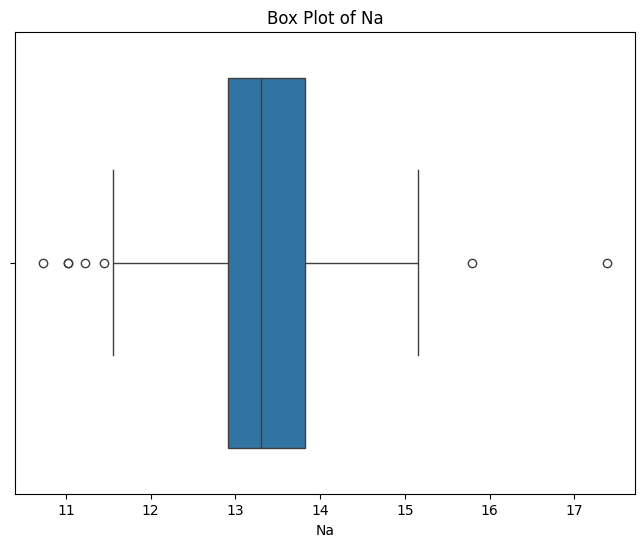

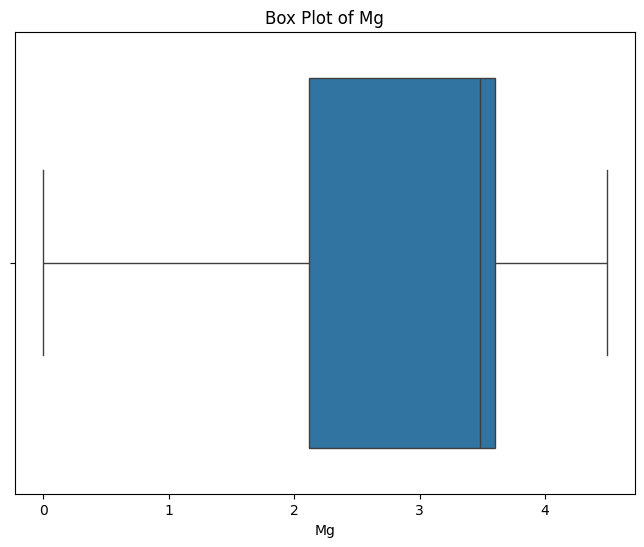

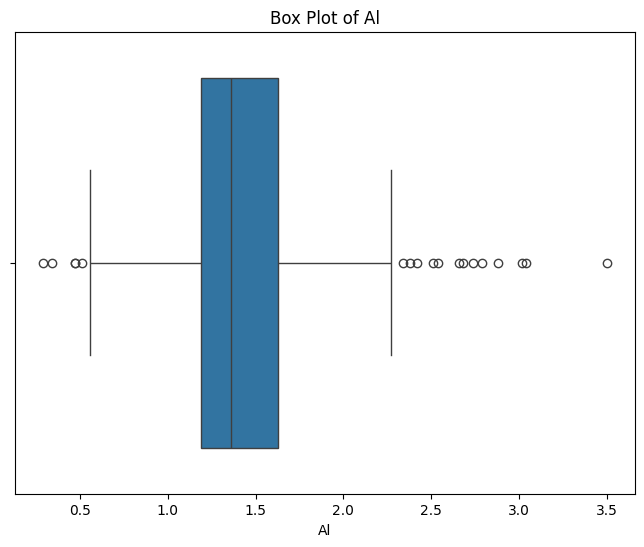

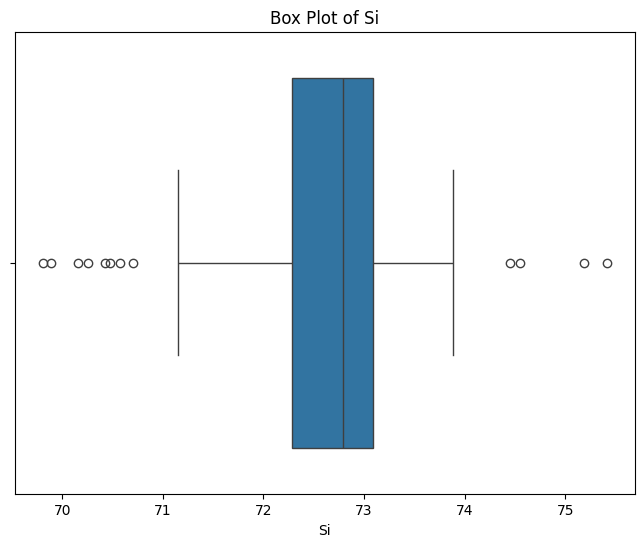

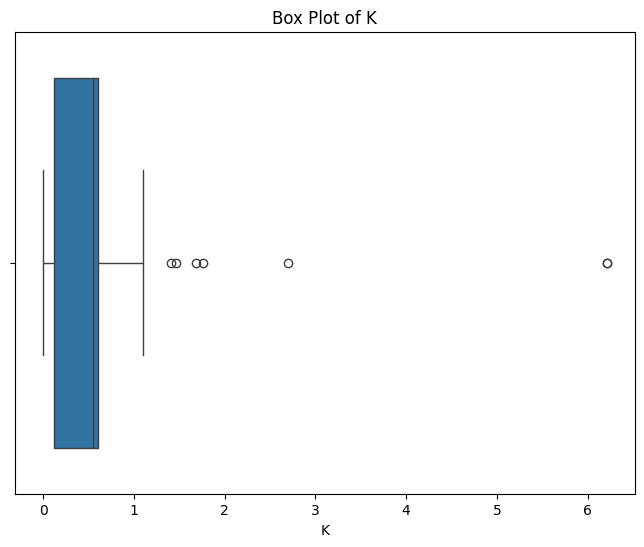

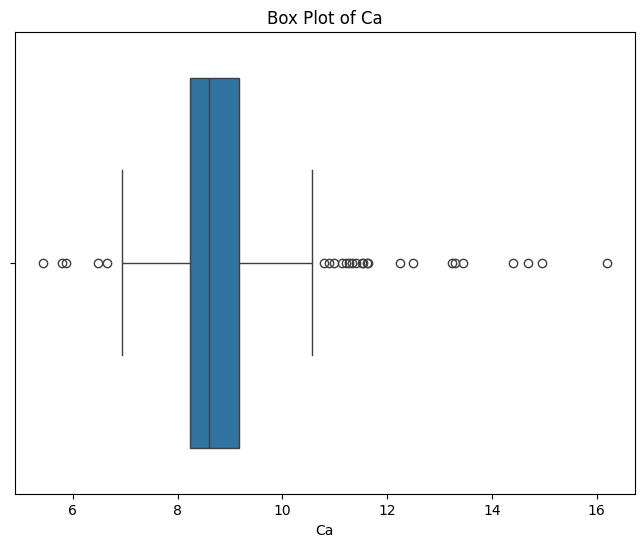

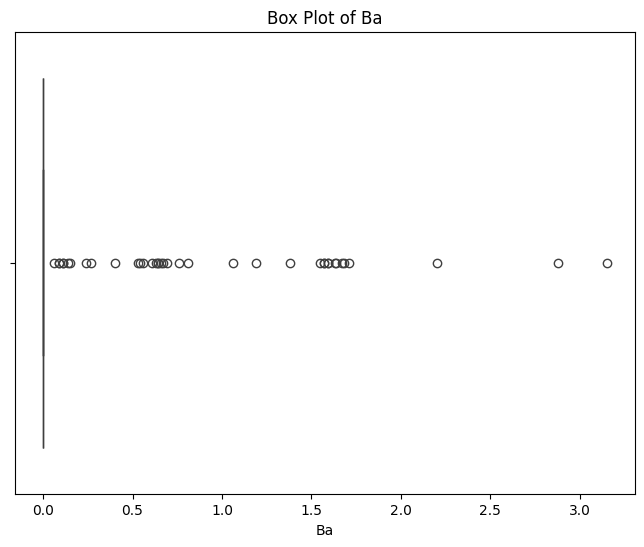

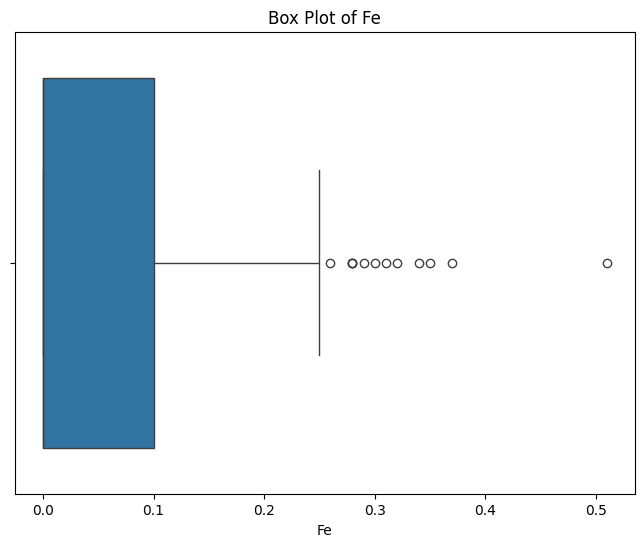

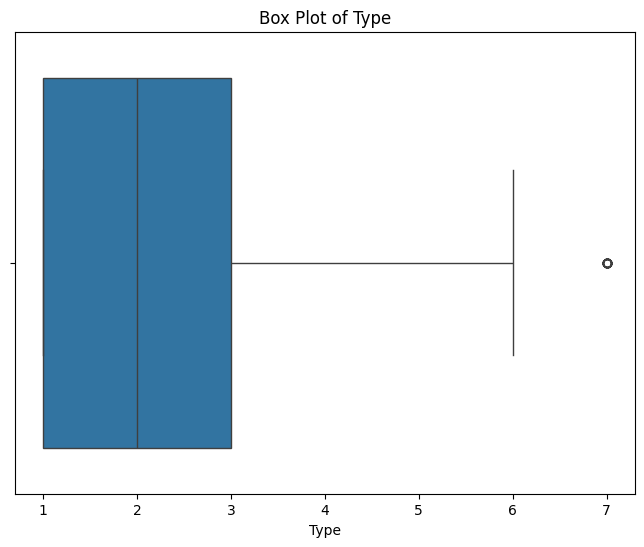

In [ ]:
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()           # outlier visualization

In [ ]:
for column in df.select_dtypes(include=['number']).columns:
    # Add 1 to avoid log(0) issues
    df[column] = np.log1p(df[column])
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.924660,2.683758,1.702928,0.741937,4.287441,0.058269,2.277267,0.000000,0.0,0.693147
1,0.923310,2.700690,1.526056,0.858662,4.300410,0.392042,2.178155,0.000000,0.0,0.693147
2,0.922742,2.676215,1.515127,0.932164,4.303930,0.329304,2.172476,0.000000,0.0,0.693147
3,0.923330,2.653946,1.545433,0.828552,4.298781,0.451076,2.221375,0.000000,0.0,0.693147
4,0.923235,2.658159,1.530395,0.806476,4.305146,0.438255,2.204972,0.000000,0.0,0.693147
...,...,...,...,...,...,...,...,...,...,...
209,0.922762,2.717340,0.000000,1.355835,4.298781,0.076961,2.320425,0.722706,0.0,2.079442
210,0.923008,2.767576,0.000000,1.095273,4.304876,0.000000,2.240710,0.951658,0.0,2.079442
211,0.924517,2.731767,0.000000,1.105257,4.309725,0.000000,2.244956,0.970779,0.0,2.079442
212,0.922873,2.733068,0.000000,1.078410,4.312275,0.000000,2.249184,0.943906,0.0,2.079442


#Data Visualization

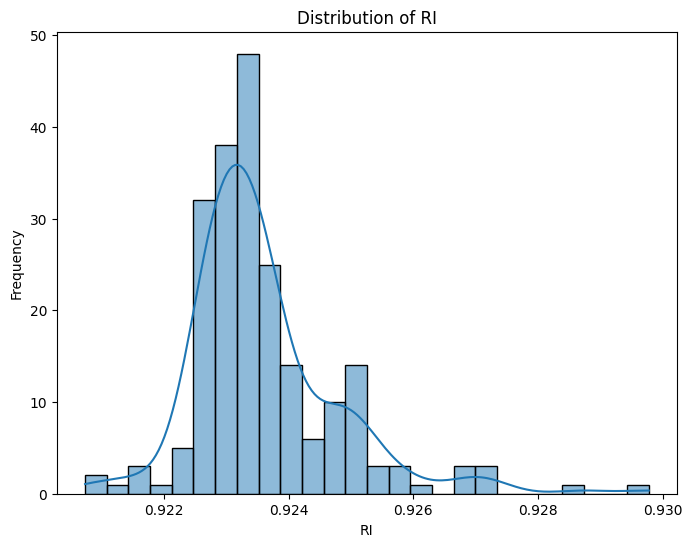

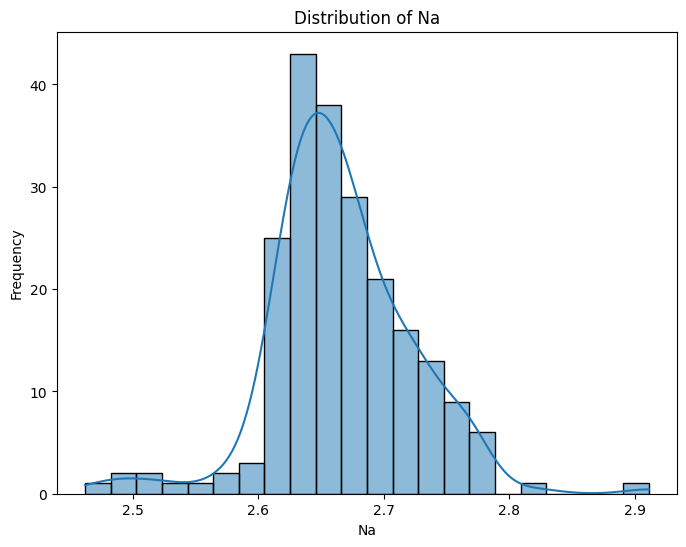

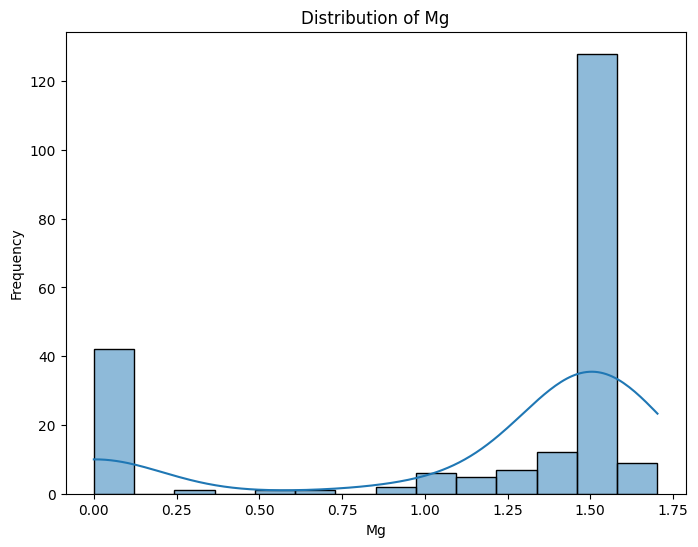

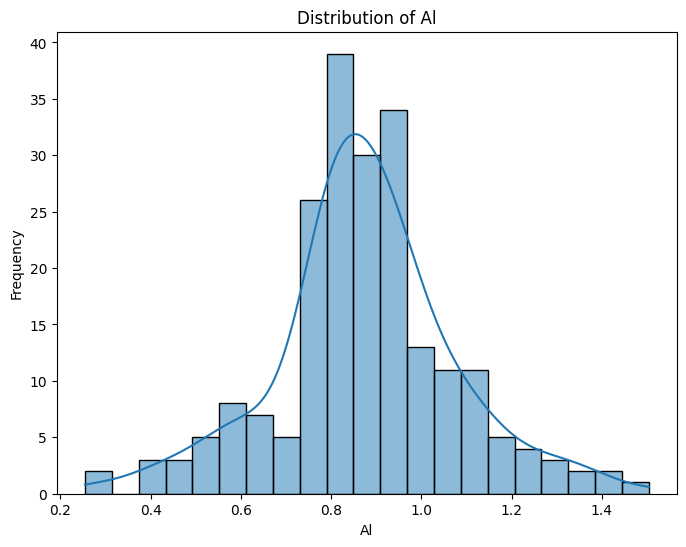

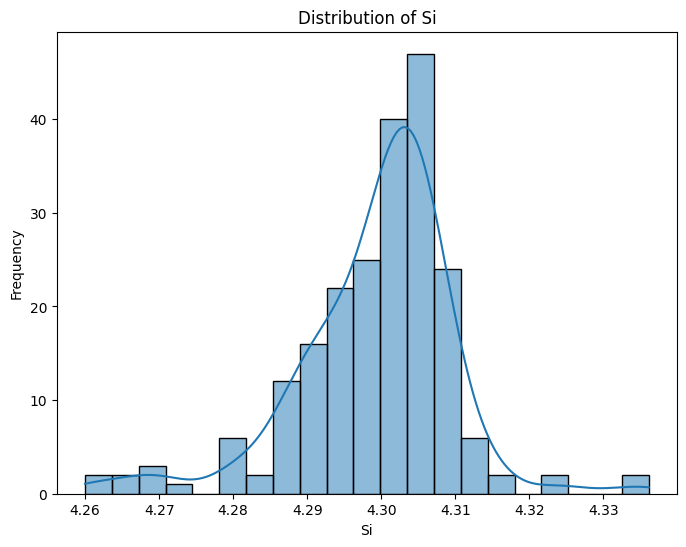

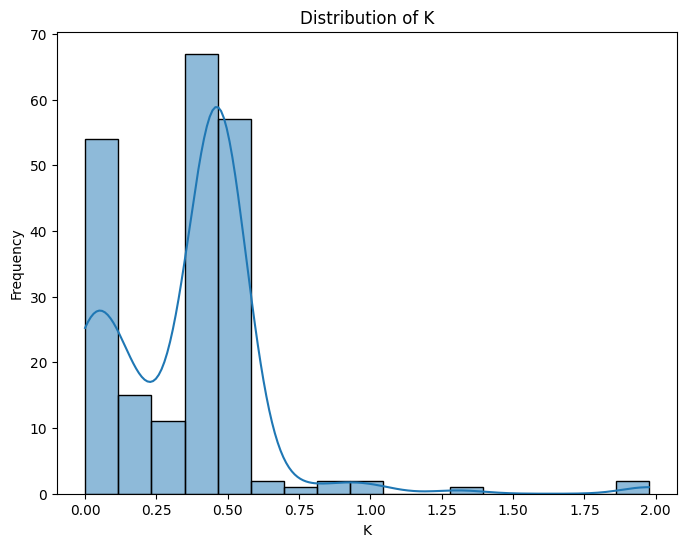

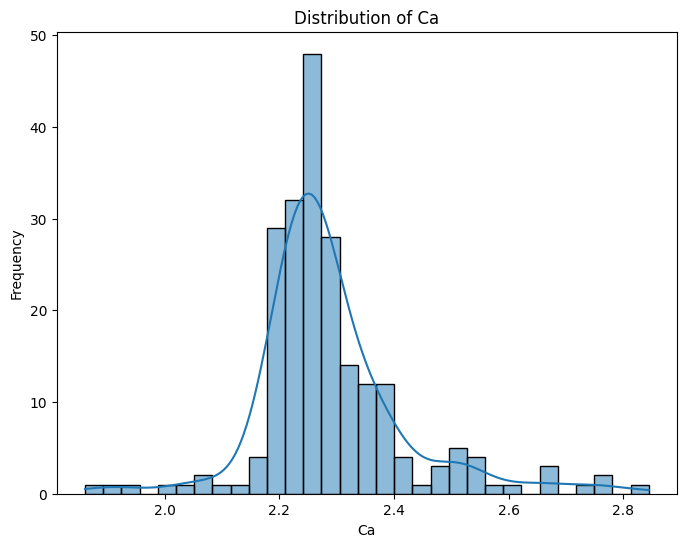

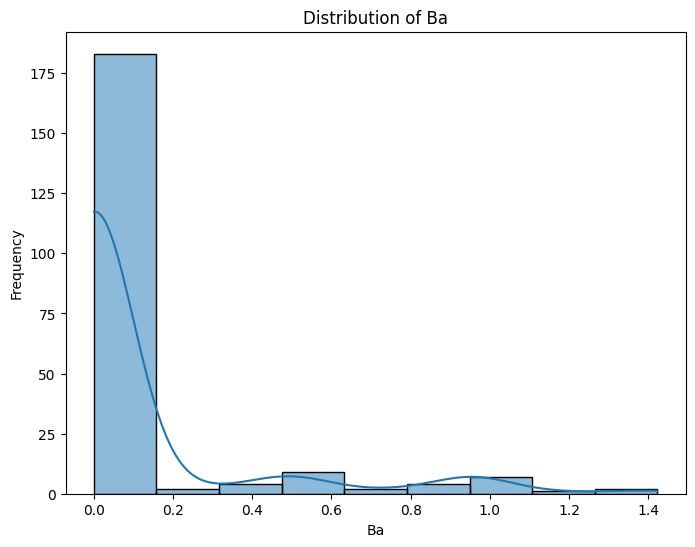

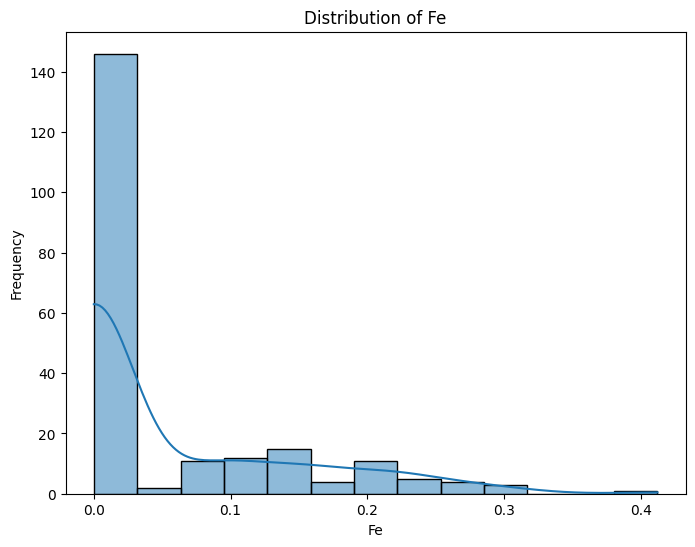

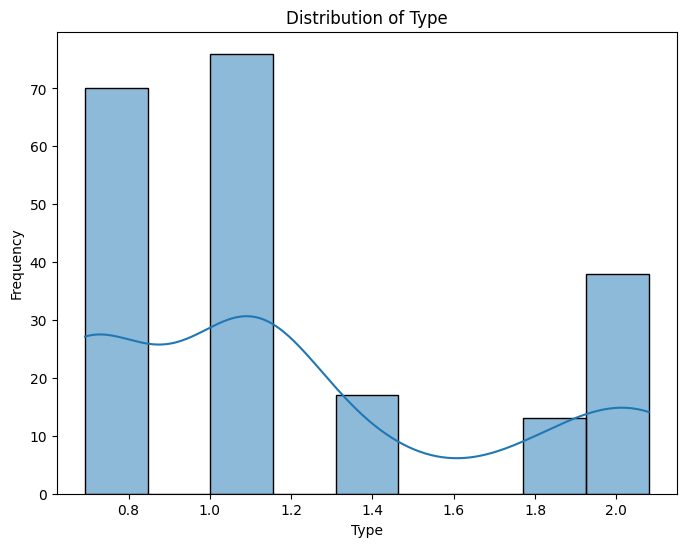

In [ ]:
# Create histograms for numerical features
for column in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

##pairplot

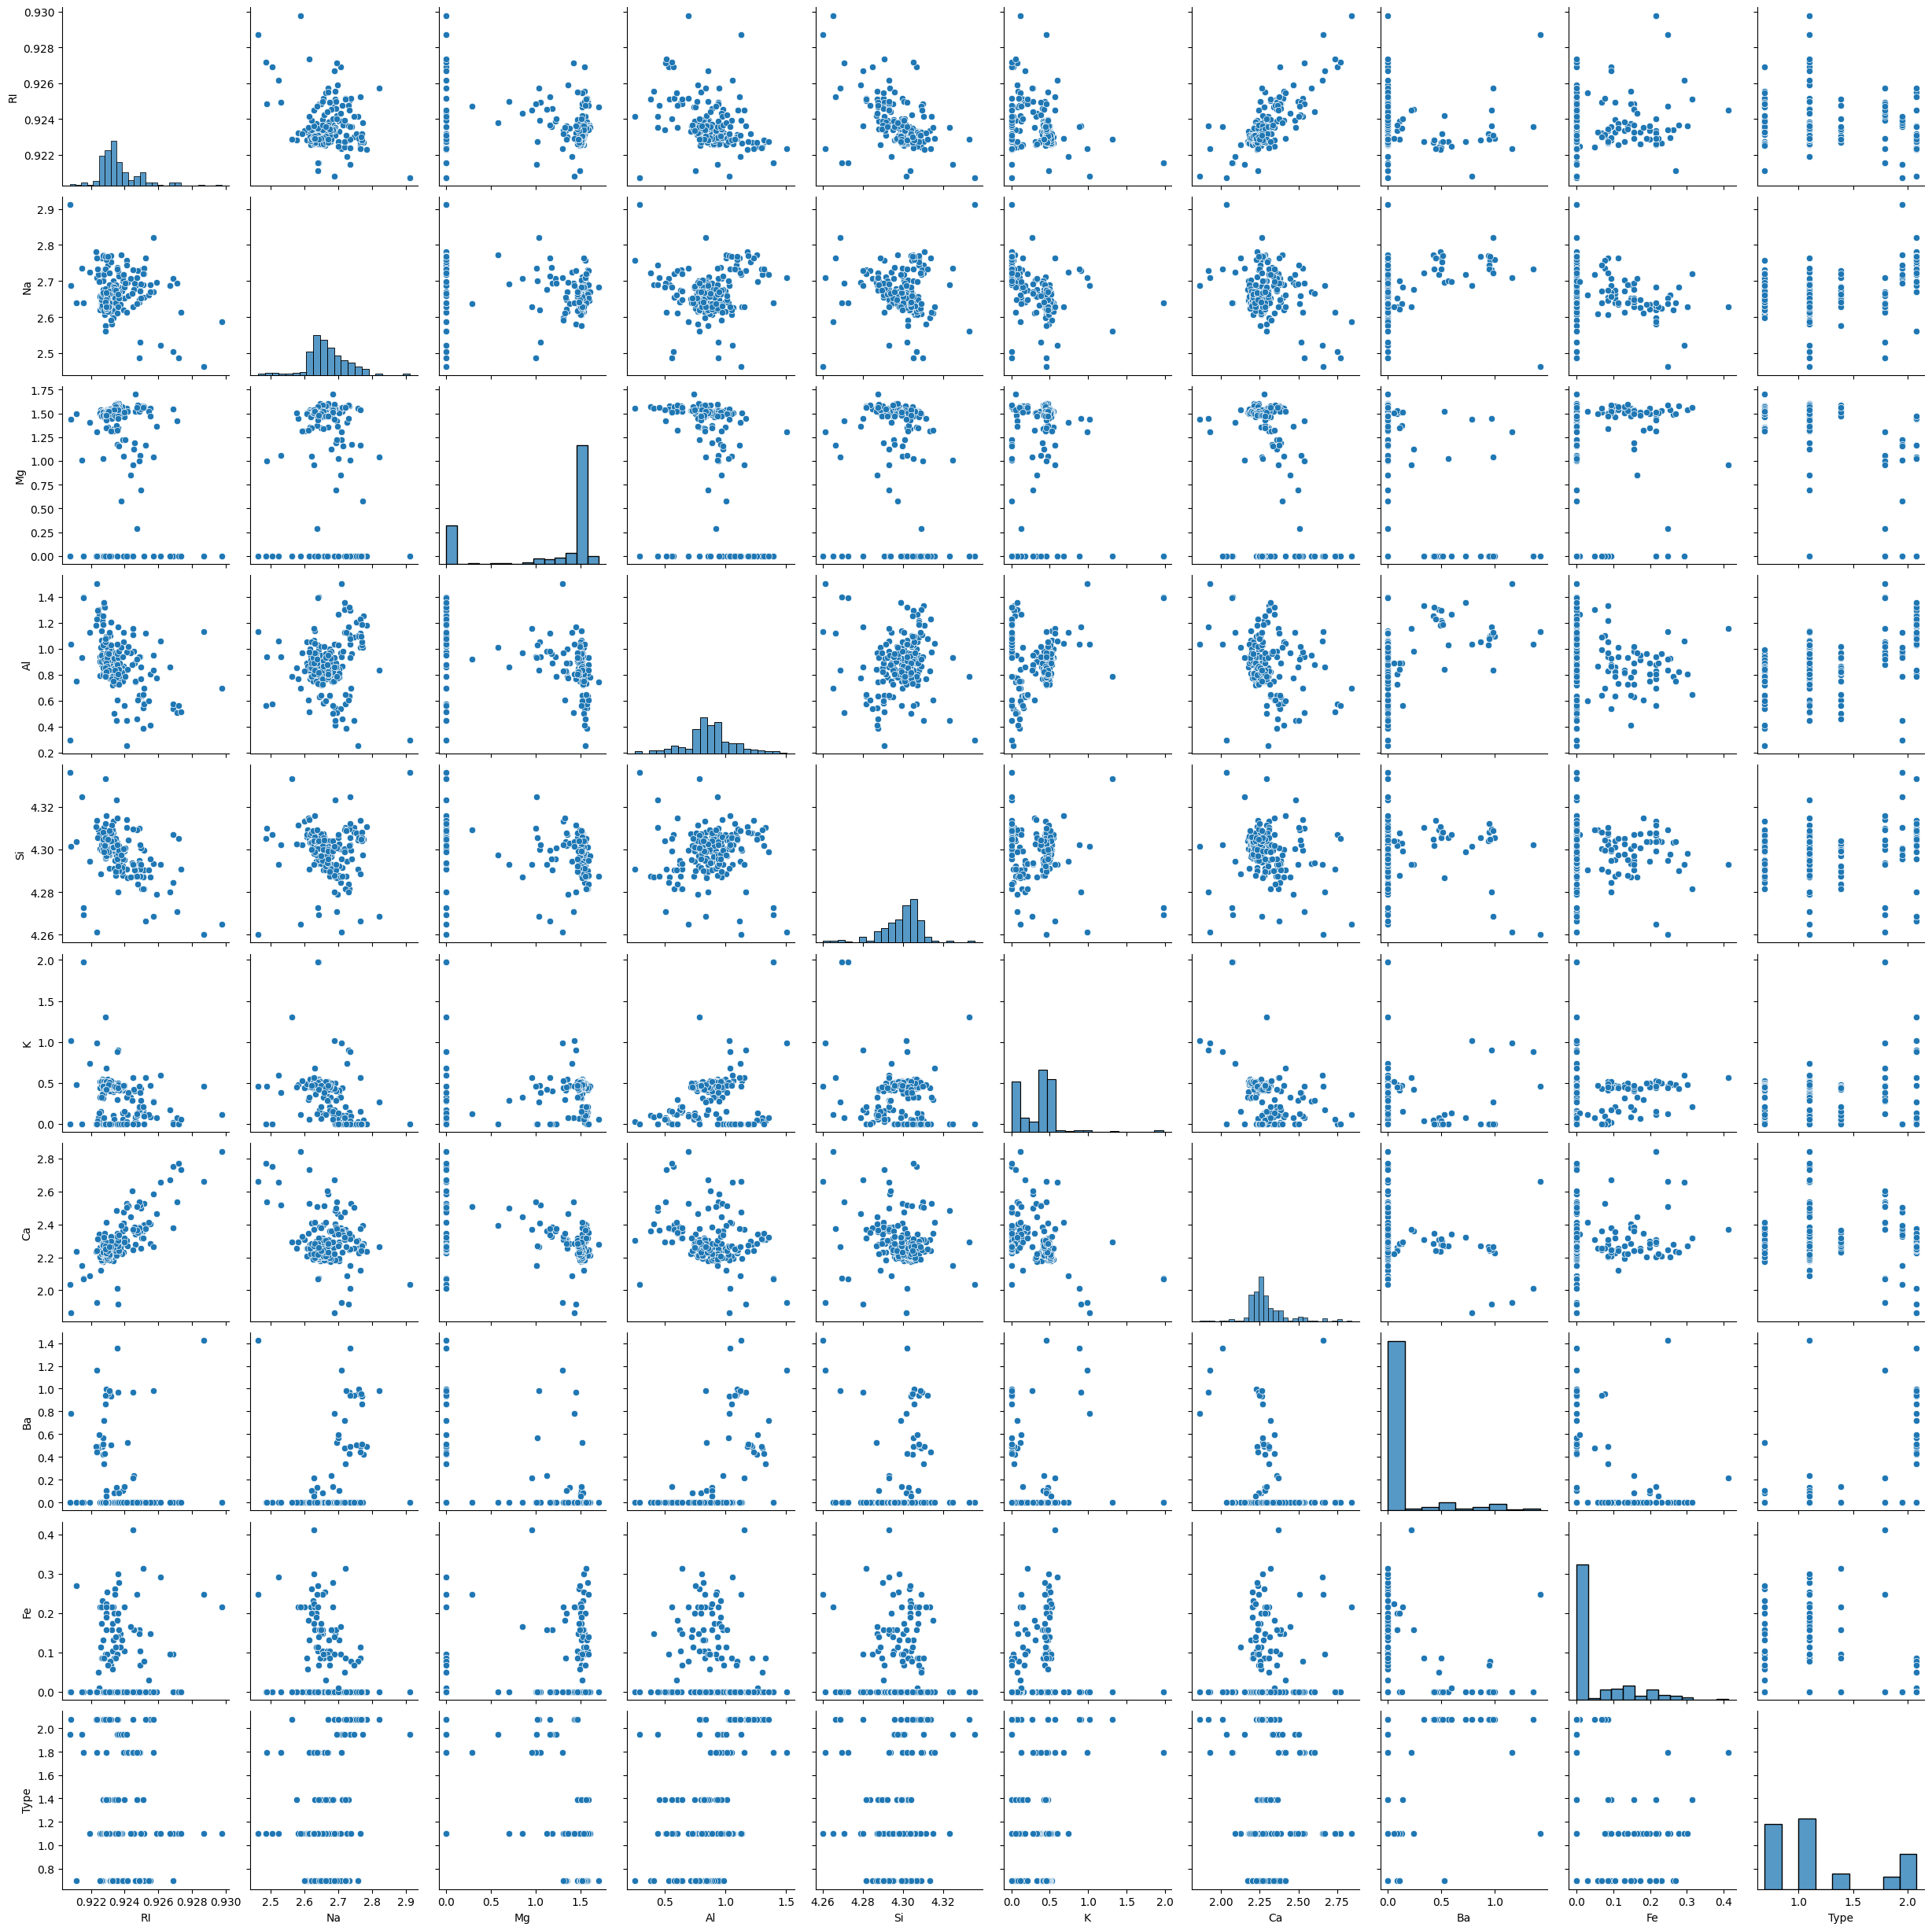

In [ ]:
sns.pairplot(df)

#Data Preprocessing

** as i applied log transformation above so i feel no need to apply standardization or normalization**

In [ ]:
# there are no categorical variables for encoding
#no need for feature scaling

# Random Forest Model Implementation


In [ ]:
x = df.iloc[:, :-1]  # Select all columns except the last one as features
y = df.iloc[:, -1]   # Select the last column as the target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a Random Forest classifier object
rf_regressor = RandomForestRegressor(random_state=42)

In [ ]:
#model fitting
rf_regressor.fit(x_train, y_train)
# Make predictions
y_pred = rf_regressor.predict(x_test)
# Define a threshold to convert predictions to classes
threshold = 0.5

# Convert predictions to binary classes
y_pred_binary = np.where(y_pred >= threshold, 1, 0)
y_test_binary = np.where(y_test >= threshold, 1, 0)

accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


#adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

adaboost_regressor = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

# Fit the model
adaboost_regressor.fit(x_train, y_train)

# Make predictions
adaboost_pred = adaboost_regressor.predict(x_test)

#**Evaluation**

In [ ]:
models = ['RandomForest', 'AdaBoost' ]
predictions = [rf_pred, adaboost_pred]

for model, pred in zip(models, predictions):
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{model}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  R-squared: {r2:.4f}")
    print("-" * 20)

RandomForest:
  MSE: 0.7224
  R-squared: -1.6549
--------------------
AdaBoost:
  MSE: 0.0543
  R-squared: 0.8005
--------------------


In [ ]:
# 1. Explain Bagging and Boosting methods. How is it different from each other.


Bagging: Creates a "committee" of models that work independently and vote on the final prediction.


Boosting: Creates a "chain" of models where each model tries to improve on the mistakes of the previous one.

In [ ]:
# 2. Explain how to handle imbalance in the data

Resampling: Oversample the minority class (e.g., using SMOTE) or undersample the majority class.
Cost-Sensitive Learning: Penalize misclassifications of the minority class more heavily.
Using appropriate Evaluation Metrics like Precision, Recall, F1-score, and ROC AUC, instead of just accuracy.

#Interview Questions

1> Explain Bagging and Boosting methods. How is it different from each other.

Bagging: Creates multiple models from different subsets of data and combines their predictions to reduce variance and improve stability. Example: Random Forest.

Boosting: Creates a sequence of models, each correcting errors of the previous one, to reduce bias and improve accuracy. Example: AdaBoost, XGBoost.

Key Difference: Bagging focuses on reducing variance, while Boosting focuses on reducing bias. Bagging trains models in parallel, while Boosting trains them sequentially.

2> Explain how to handle imbalance in the data.

Resampling:
Oversampling: Increase instances of the minority class
Undersampling: Decrease instances of the majority class.


Cost-Sensitive Learning: Penalize misclassifications of the minority class more heavily during training.


Use appropriate Evaluation Metrics: Focus on precision, recall, F1-score, and ROC AUC, instead of just accuracy.